# Assignment 2

This problem set/assignment will require you to create simple quantum algorithms and implement them in QISKIT so that we can autograde your work.  We have presented QISKIT in our notes and provided many examples of how to express quantum circuits in QISKIT. You may find documentation of QISKIT from the IBM website: https://docs.quantum.ibm.com/


## Problem 1

$$\newcommand\ket[1]{\left| #1 \right\rangle }$$

Implement a three bit quantum circuit that starts with the bits initialized in the pure state $\ket{000}$ and yields the following state:
$$ \frac{1}{\sqrt{2}} ( \ket{000} +  \ket{111} )$$

First design your strategy and verify that it will work.


YOUR ANSWER HERE

Design your circuit using IBM's qiskit library. For convenience, we will pass an instance of a `QuantumCircuit` to your function. The inputs are qubits indexed $0, 1, 2$. Please do not create/use any ancillary qubits besides the input qubits. Also, please do not use any measurements on your circuit. 

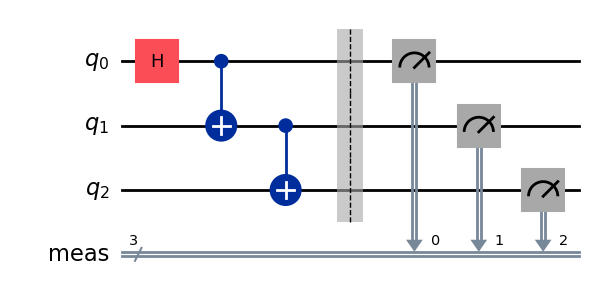

In [1]:
from qiskit import QuantumCircuit

def create_ghz_circuit(qc):
    # please implement your circuit here.
    # useful tutorials
    #  https://docs.quantum.ibm.com/build/circuit-construction
    # your code here
    qc.h(0)
    qc.cx(0,1)
    qc.cx(1,2)
    # raise NotImplementedError
    
qc = QuantumCircuit(3) # create a quantum circuit with three qubits
create_ghz_circuit(qc) # call the code created by the student to populate the gates in the circuit
qc.measure_all() # measure the outputs
qc.draw('mpl', style="iqp") # draw the circuit

/var/folders/nz/m7btrx796jl1bvgth7q4y5wm0000gn/T/ipykernel_66035/1890468657.py:5: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('aer_simulator')


Result counts from 1024 simulations: {'000': 499, '111': 525}


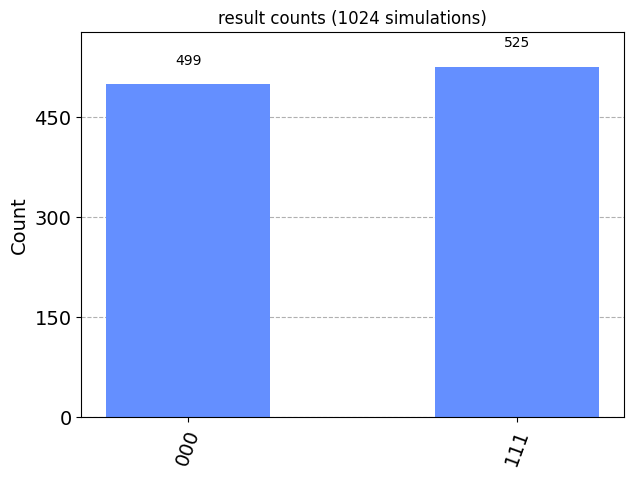

In [2]:
from qiskit import transpile 
from qiskit import Aer

from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator) 

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(circ)
print(f'Result counts from 1024 simulations: {counts}')
assert counts['000'] >= 450 and counts['111'] >= 450, 'counts of 000 and 111 state are not roughly equal'
assert ('001' not in counts), 'qubit 001 part of superposition which should not be the case'
assert ('011' not in counts), 'qubit 011 part of superposition which should not be the case'
assert ('010' not in counts), 'qubit 010 part of superposition which should not be the case'
assert ('100' not in counts), 'qubit 100 part of superposition which should not be the case'
assert ('101' not in counts), 'qubit 101 part of superposition which should not be the case'
assert ('110' not in counts), 'qubit 110 part of superposition which should not be the case'
plot_histogram(counts, title='result counts (1024 simulations)')

### Problem 1B (Quantum Teleportation)

We will now look into the problem of "destructive" copying of a quantum state called quantum teleportation. 
Suppose we have a qubit $b_0$ that is currently a super position $\ket{\varphi} = a_0 \ket{0} + a_1 \ket{1}$ and another qubit $b_1$ initialized to $\ket{0}$. We wish to  transform $b_1$ to be $\ket{\varphi}$ while $b_0$ is potentially destroyed in the process. Note that no-cloning theorem will not allow us to do this without changing $b_0$ in some way.

Prove that the following steps will copy $b_0$ over to $b_1$ by completing the calculations asked of you. 

Let $b_0$ be in the super position $\ket{\varphi}$ above and $b_1$ in initial state $\ket{0}$. The joint system is in the state  
$$ \ket{\varphi} \otimes \ket{0} = a_0 \ket{00} + a_1 \ket{10} $$

  1. Apply the Hadamard gate to $b_1$. What is the resulting state?

YOUR ANSWER HERE

  2. Apply the controlled-X gate to qubit $b_0$ with control qubit $b_1$. What is the resulting state?

YOUR ANSWER HERE

3. Apply the controlled-X gate to qubit $b_1$ with control qubit $b_0$. What is the resulting state?

YOUR ANSWER HERE

  4. Measure the qubit $b_0$. Write down the possible results of the measurement along with the probabilities and the states for $b_1$ after the partial measurement.

YOUR ANSWER HERE

If you followed along the steps above, you will realize that the quantum circuit will cause $b_0$ to collapse to either a $\ket{0}$ or a $\ket{1}$ but $b_1$ will now have $\ket{\varphi}$. This is the essence of _quantum teleportation_. It is important that you do the calculations correctly and obtain the result before you try the problem below.


5. Implement the function `quantum_teleport` that takes in an instance of `QuantumCircuit` and index of two qubits `b0` and `b1`. It should implement the above scheme to copy `b0` into `b1`, which is initialized to $\ket{0}$. Do not measure `b1`.

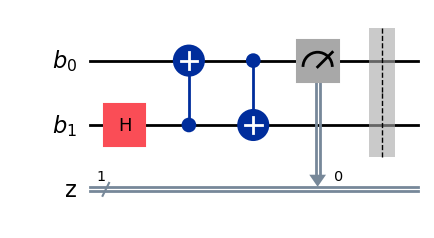

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
def quantum_teleport(qc, b0, b1, cbit): 
    # qc is a quantum circuit instance 
    # b0 and b1 are indices of two bits. 
    # cbit is a classical bit that you will need for the partial mmeasurement at step 4.
    # assume b0 != b1
    # implement the circuit to "teleport" the state of q1 to q2.
    # do not introduce any ancillary qubits.
    # no need to return anything: you will be mutating the circuit qc.
    # your code here
    qc.h(b1)
    qc.cx(b1,b0)
    qc.cx(b0,b1)
    qc.measure(b0,cbit)
    qc.barrier()

    # raise NotImplementedError
    
b = QuantumRegister(2, 'b')
c = ClassicalRegister(1,'z')
qc = QuantumCircuit(b, c)
quantum_teleport(qc, b[0], b[1], c[0])
qc.draw('mpl', style='iqp')

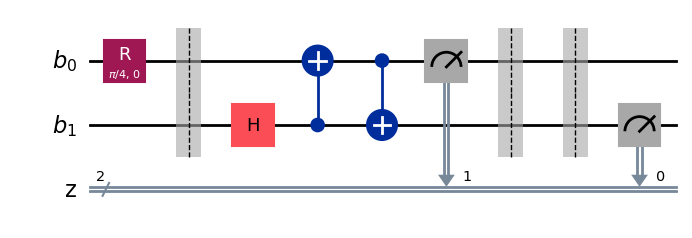

Result counts from 1024 simulations: {'01': 69, '11': 78, '10': 449, '00': 428}
 b0 = |0> count is 497 and b0=|1> count is 527 : must be roughly equal
 b1 = |0> count is 877 and b1=|1> count is 147 :expected  b1 = |1> happens roughly 17% of the time, and b1=|0> 83% 
Test passed


In [4]:
# Test 1. We will create a single qubit circuit and copy it over.
# 
from numpy import pi
from qiskit import Aer, transpile

b = QuantumRegister(2, 'b')
c = ClassicalRegister(2,'z')
qc_test1 = QuantumCircuit(b, c)

qc_test1.r(2*pi/8, 0.0, b[0]) # apply a pi/8 rotation
# b[0] should be prepared in state 
# cos(pi/8) |0> - sin(pi/8) |1>
qc_test1.barrier()
# Teleport b[0] to b[1]
quantum_teleport(qc_test1, b[0], b[1], c[1]) # teleport 
qc_test1.barrier()
qc_test1.measure(b[1], c[0]) # measure
display(qc_test1.draw('mpl', style='iqp'))
# test 
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc_test1, simulator) 

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(f'Result counts from 1024 simulations: {counts}')
# collect the counts
# roughly we should get measurement of b[0] = 0, b[0] = 1 with 50% probability
# probability of b[1] = 0 and b[1] = 1 must be in the ratio tan^2(pi/8) ~ 0.17157

b0_0_count = counts['00'] + counts['01']
b0_1_count = counts['10'] + counts['11']
print(f' b0 = |0> count is {b0_0_count} and b0=|1> count is {b0_1_count} : must be roughly equal')
assert b0_0_count >= 0.85 * 512 and b0_0_count <= 1.15 * 512

b1_0_count = counts['00'] + counts['10']
b1_1_count = counts['01'] + counts['11']

print(f' b1 = |0> count is {b1_0_count} and b1=|1> count is {b1_1_count} :expected  b1 = |1> happens roughly 17% of the time, and b1=|0> 83% ')
assert b1_0_count >= 0.7 * 1024 and b1_0_count <= 0.95 * 1024

print('Test passed')


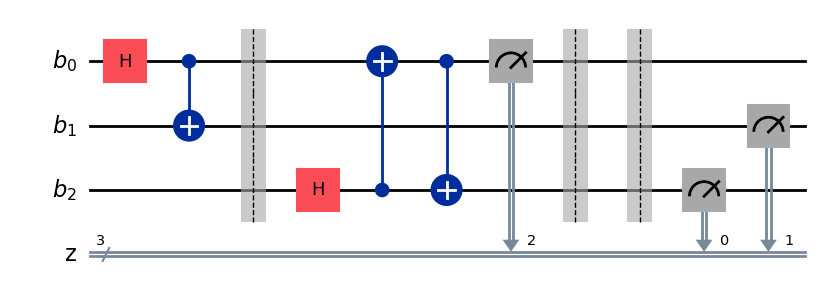

Result counts from 1024 simulations: {'111': 254, '100': 231, '011': 267, '000': 272}
Test passed


In [5]:
# Test 1. We will create a single qubit circuit and copy it over.
# 
from numpy import pi
from qiskit import Aer, transpile

b = QuantumRegister(3, 'b')
c = ClassicalRegister(3,'z')
qc_test2 = QuantumCircuit(b, c)
# create the bell state for b[0] and b[1]
qc_test2.h(b[0])
qc_test2.cx(0, 1)
qc_test2.barrier()
# Teleport b[0] to b[2]
quantum_teleport(qc_test2, b[0], b[2], c[2]) # teleport b0 into b2
qc_test2.barrier()
qc_test2.measure(b[2], c[0]) # measure
qc_test2.measure(b[1], c[1]) # measure
display(qc_test2.draw('mpl', style='iqp'))
# test 
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc_test2, simulator) 

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(f'Result counts from 1024 simulations: {counts}')
# there should be no count for states of the form `*01` and `*10`
assert('001' not in counts)
assert('010' not in counts)
assert('101' not in counts)
assert('110' not in counts)
assert(0.2 * 1024 <= counts['000'] <= 0.3 * 1024)
assert(0.2 * 1024 <= counts['011'] <= 0.3 * 1024)
assert(0.2 * 1024 <= counts['100'] <= 0.3 * 1024)
assert(0.2 * 1024 <= counts['111'] <= 0.3 * 1024)

print('Test passed')


## Problem 3  (Alice, Bob and Bell's Inequality)

In this problem, we will implement the protocol between Alice and Bob that was described in the video lecture on Bell's inequality. We would like you to examine that lecture video before attempting it.

  - Alice and Bob are each given a classical bit and a qubit $b_1, q_1$ for Alice and $b_2, q_2$ are Bob.
  - The classical bits are each the result of the toss of a fair coin. But these are not yet revealed to Alice/Bob.
  - The qubits of Alice/Bob are entangled so that $\ket{q_1 q_2} = \frac{1}{\sqrt{2}} ( \ket{00} + \ket{11})$.
  - At a given moment in time, each of them gets to know their own bits.
  - They need to respond back with answers in the form of classical bits $z_1, z_2$ 
  - They win if $ b_1 \land b_2 = z_1 \oplus z_2$.
  
The best they can do without the aid of qubits is a winning probability of $0.75$ that can be obtained by simply each responding with a $0$ (the only way they lose is if $b_1 = b_2 = 1$ which is assumed to happen with $1/4$ probability).

We showed a protocol in the video that allows them to beat the classical probability limit. Your goal is to implement that as part of a quantum circuit. 

Implement the function `alice_response(qcircuit, b1, qbit, cbit)` that inputs a the coin toss result for alice `b1`, Alice's  qubit `qbit` (entangled with Bob's but that does not matter here) and a classical bit to measure into. There is no need to return any results: we will take care of that in the testing code where we will read the classical bit as `cbit` as Alice's response.

Implement similarly the function `bob_response(qcircuit, b2, qbit, cbit)` for Bob.

Note: you can use the quantum rotation gate `ry(2*theta,  qbit)` to implement a `theta` degree rotation on a qubit. Cf.
 - https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RYGate
 - https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#ry

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import pi

def alice_response(qc, b1, qbit, cbit):
    # your code here
    if b1 == 1:
        qc.ry(pi/8, qbit)
    qc.measure(qbit, cbit)

#     raise NotImplementedError

def bob_response(qc, b2, qbit, cbit ):
    # your code here
    if b2 == 1:
        qc.ry(-pi/8, qbit)
    qc.measure(qbit, cbit)

#     raise NotImplementedError


Circuit for b1 = True and b2 = True


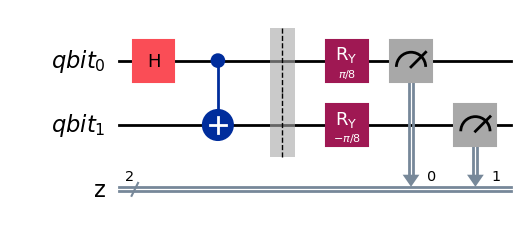

{'01': 73, '10': 77, '11': 431, '00': 443}
Circuit for b1 = True and b2 = False


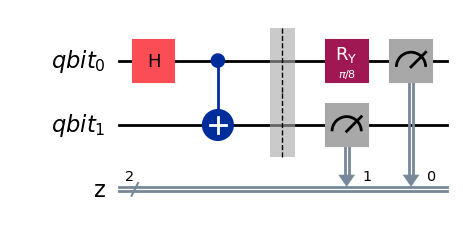

{'01': 23, '10': 11, '11': 485, '00': 505}
Circuit for b1 = False and b2 = True


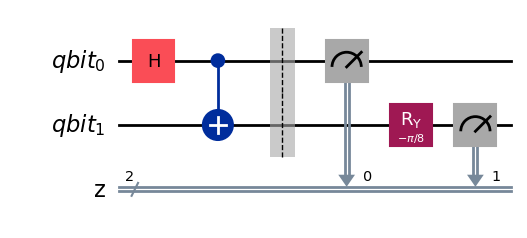

{'01': 16, '10': 17, '11': 505, '00': 486}
Circuit for b1 = False and b2 = False


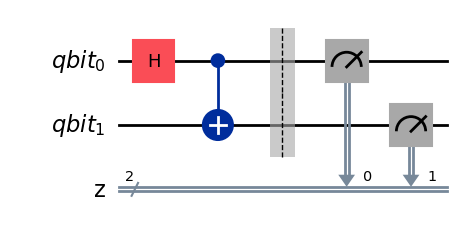

{'00': 531, '11': 493}
Probability of Alice/Bob Winning is estimated to be: 0.770263671875


In [7]:
from qiskit import transpile, Aer, QuantumRegister, ClassicalRegister, QuantumCircuit
def create_and_run_circuit(b1, b2):
    # let's collect the counts for b1 = 1, b2 = 1
    qbits11 = QuantumRegister(2, 'qbit')
    cbits11 = ClassicalRegister(2, 'z')
    # create the bell state
    print(f'Circuit for b1 = {b1} and b2 = {b2}')
    qc_11 = QuantumCircuit(qbits11, cbits11)
    qc_11.h(qbits11[0])
    qc_11.cx(qbits11[0], qbits11[1])
    qc_11.barrier()
    alice_response(qc_11, b1, qbits11[0], cbits11[0])
    bob_response(qc_11, b2, qbits11[1], cbits11[1] )
    display(qc_11.draw('mpl', style='iqp'))
    # simulate 
    # test 
    simulator = Aer.get_backend('aer_simulator')
    circ11 = transpile(qc_11, simulator) 
    # Run and get counts
    result = simulator.run(qc_11).result()
    counts = result.get_counts(circ11)
    print(counts)
    return counts 

success_count = 0
counts = create_and_run_circuit(True, True)
assert '01' in counts, 'Your result for b1 = True and b2 = True must have non-zero amplitude for |01>'
assert '10' in counts, 'Your result for b1 = True and b2 = True must have non-zero amplitude for |10>'
success_count += (counts['01'] + counts['10'])
counts = create_and_run_circuit(True, False)
assert '00' in counts, 'Your result for b1 = True and b2 = False must have non-zero amplitude for |01>'
assert '11' in counts, 'Your result for b1 = True and b2 = False must have non-zero amplitude for |10>'
success_count += (counts['00'] + counts['11'])
counts = create_and_run_circuit(False, True)
assert '00' in counts, 'Your result for b1 = False and b2 = True must have non-zero amplitude for |01>'
assert '11' in counts, 'Your result for b1 = False and b2 = True must have non-zero amplitude for |10>'
success_count += (counts['00'] + counts['11'])
counts = create_and_run_circuit(False, False)
assert '00' in counts, 'Your result for b1 = False and b2 = False must have non-zero amplitude for |01>'
assert '11' in counts, 'Your result for b1 = False and b2 = False must have non-zero amplitude for |10>'
success_count += (counts['00'] + counts['11'])

print(f'Probability of Alice/Bob Winning is estimated to be: {success_count/(4*1024)}')




## Grover Search Marking Circuit

Design a quantum circuit with $4$ input bits $b_0, b_1, b_2, b_3$ such that it "marks" the amplitudes corresponding to the states  $$\ket{b_0 b_1 b_2 b_3} \in \left\{ \ket{0011}, \ket{1100}, \ket{0101} \right\}$$ by inverting their amplitudes, leaving all other states unchanged. In this problem, you are asked to achieve this without using ancillary qubits or a result bit.

Let us consider the simple problem of inverting the amplitude corresponding to $\ket{1111}$ leaving all the others unchanged. Show that this can be performed using a "multi controlled phase gate" with a phase of $\pi$ radians. Write down a brief description of how such a circuit would work. See documentation for such a gate:
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.MCPhaseGate


YOUR ANSWER HERE

Using the idea of a multi-controlled phase gate, now use X-gates (quantum not) to convert each of the pure states $\ket{0011}, \ket{1100}, \ket{0101}$ each to $\ket{1111}$ and use MCP gate above to mark the phase. Remember to use X-gates to convert the inputs back.

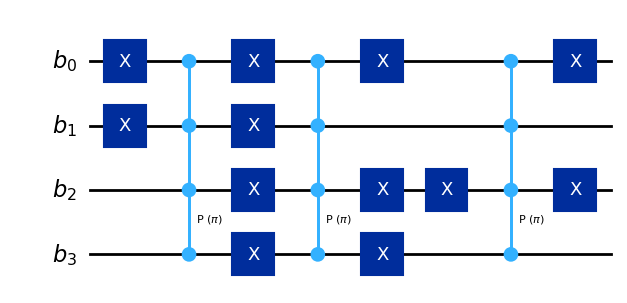

In [8]:
from qiskit import QuantumRegister, QuantumCircuit
from numpy import pi
def mark_pure_states(qc, b0 , b1, b2, b3):
    # mark the components corresponding to the pure states |0011> , |1100>, |0101>
    # your code here
    qc.x(b0)
    qc.x(b1)
    qc.mcp(pi, [b0, b1, b2], b3)
    qc.x(b1)
    qc.x(b0)

    qc.x(b2)
    qc.x(b3)
    qc.mcp(pi, [b0, b1, b2], b3)
    qc.x(b3)
    qc.x(b2)

    qc.x(b0)
    qc.x(b2)
    qc.mcp(pi, [b0, b1, b2], b3)
    qc.x(b2)
    qc.x(b0)
    # raise NotImplementedError
    
    
b = QuantumRegister(4, 'b')
qc = QuantumCircuit(b)
mark_pure_states(qc, b[0], b[1], b[2], b[3])
qc.draw('mpl', style='iqp')

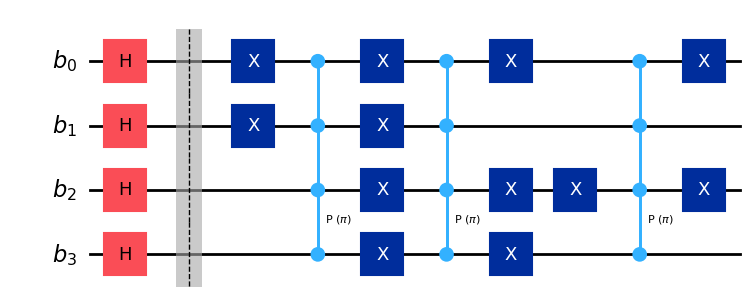

Statevector([ 0.25+0.000000e+00j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
             -0.25+3.061617e-17j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
              0.25+0.000000e+00j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
              0.25+0.000000e+00j, -0.25+3.061617e-17j,  0.25+0.000000e+00j,
             -0.25+3.061617e-17j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
              0.25+0.000000e+00j],
            dims=(2, 2, 2, 2))


/var/folders/nz/m7btrx796jl1bvgth7q4y5wm0000gn/T/ipykernel_66035/2308158800.py:14: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend)


In [9]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
b = QuantumRegister(4, 'b')
qc = QuantumCircuit(b)
# create uniform super position
qc.h(b[0])
qc.h(b[1])
qc.h(b[2])
qc.h(b[3])
qc.barrier()
mark_pure_states(qc, b[0], b[1], b[2], b[3])
display(qc.draw('mpl', style='iqp'))
# use a state vector simulator to obain the marked states
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state_vector = result.get_statevector()
print(state_vector)
for i in range(16):
    if i == 3 or i == 10 or i == 12: # are we marking the correct basis states
        assert abs(state_vector[i] +0.25) <= 0.001
    else: 
        assert abs(state_vector[i]-0.25) <= 0.001


Grover Search After Four Iterations


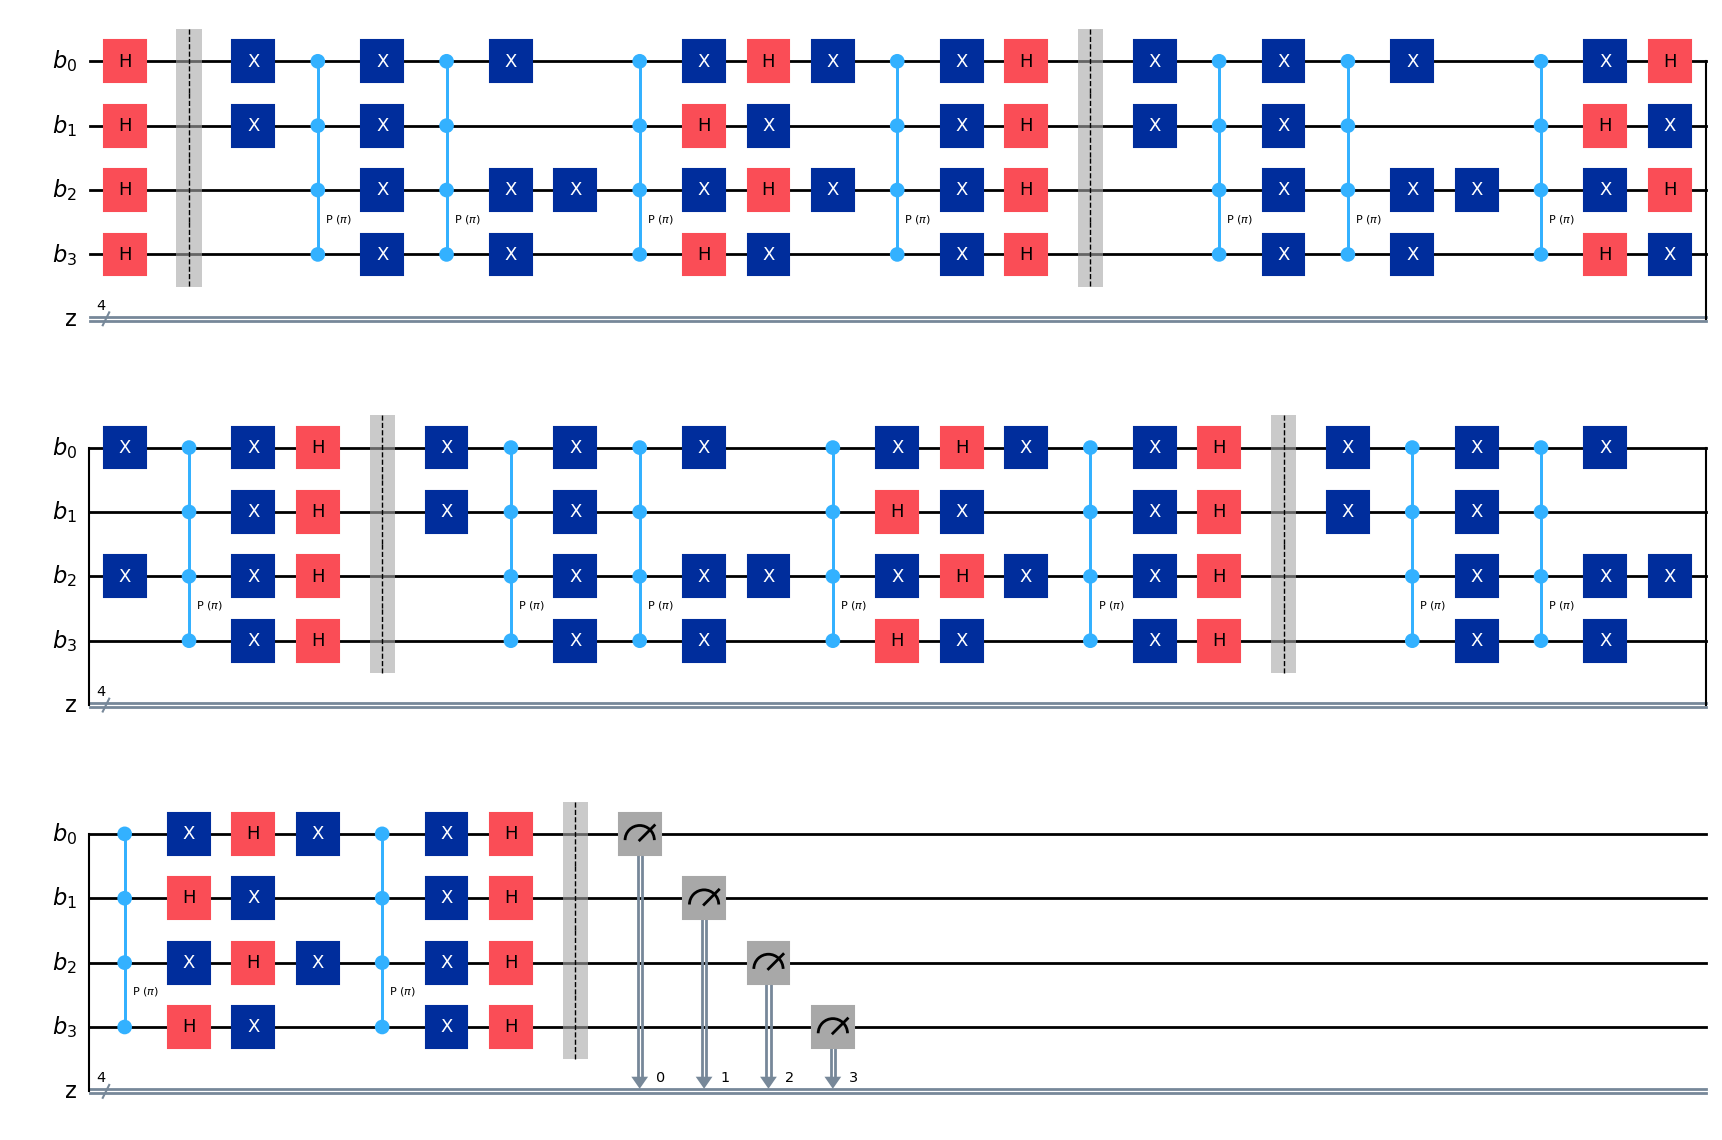

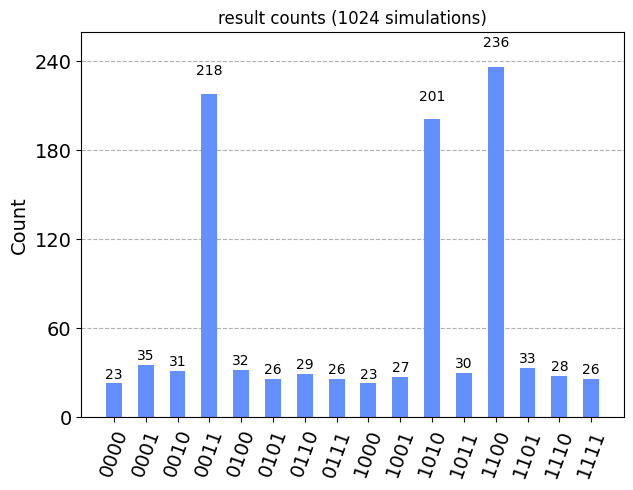

In [10]:
# Let's run Grover's algorithm 
# let's now implement Grover's search to find a value 
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute

def Uf(qc, b):
    mark_pure_states(qc, b[0], b[1], b[2], b[3])
   
def apply_reflection_about_uniform_state(qc, input_registers): 
    # qc is a previously created quantum circuit
    # input_registers are the registers that measure the input
    # n is the number of input qubits
    # 
    # 1. Apply Hadamard on each of the input registers.
    # 2. Invert all the qubits
    for i in input_registers:
        qc.h(i)
        qc.x(i)
    n = len(input_registers)
    # 3. apply a multi controlled Z gate 
    qc.mcp(np.pi, input_registers[0:n-1], input_registers[n-1])
    for i in input_registers:
        qc.x(i) # invert back
        qc.h(i) # apply Hadamard back

def Grover_diffuse(qc, inputs):
    Uf(qc, inputs)
    apply_reflection_about_uniform_state(qc, inputs)
    qc.barrier()

def create_quantum_circuit_for_grover(n_iters):
    inputs = QuantumRegister(4, 'b')
    cbit = ClassicalRegister(4, 'z')
    qc = QuantumCircuit(inputs,  cbit)
    for i in inputs:
        qc.h(i) # apply hadamard
    qc.barrier()
    for i in range(n_iters):
        Grover_diffuse(qc, inputs)
    qc.measure(inputs, cbit)
    return qc

qc2 = create_quantum_circuit_for_grover(4)
print('Grover Search After Four Iterations')

display(qc2.draw('mpl', style='iqp'))
from qiskit.tools.visualization import plot_histogram
# lets test after one iteration
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc2, simulator)

# Run and get counts
result = simulator.run(qc2).result()
counts = result.get_counts(circ)
display(plot_histogram(counts, title='result counts (1024 simulations)'))
assert counts['0011'] + counts['1010'] + counts['1100'] >= 500, "The marked states should account for more than 50% of the counts. Are you implementing the Marking circuit correctly?"

Selected Answers to manually graded problems:

## P1

The construction is similar to how we constructed the Bell state in our notes. 

  1. Apply the Hadamard operator on qubit $b_1$ to yield $\frac{1}{\sqrt{2}}(\ket{000} +\ket{100})$.
  2. Apply the controlled X gate with control qubit $b_1$ operating on $b_2$.
  3. Apply the controlled X gate with control qubit $b_1$ operating on $b_3$.

## P2
  1. $$ \frac{1}{\sqrt{2}} ( a_0 \ket{00} +  a_0 \ket{01} + a_1 \ket{10} + a_1 \ket{11} ) $$ 
  2. $$\frac{1}{\sqrt{2}} ( a_0 \ket{00} + a_0 \ket{11} + a_1 \ket{10} + a_1 \ket{01} ) = \frac{1}{\sqrt{2}} ( \ket{0} \otimes ( a_0 \ket{0} + a_1 \ket{1}) + \ket{1} \otimes (a_0 \ket{1} + a_1 \ket{0}) ) $$
  3. $$\frac{1}{\sqrt{2}} ( \ket{0} \otimes ( a_0 \ket{0} + a_1 \ket{1}) + \ket{1} \otimes (a_0 \ket{0} + a_1 \ket{1}) $$
  4. Qubit $b_0$ collapses to $\ket{0}$ with probability $\frac{1}{2}$ and $\ket{1}$ with the same probability. In either case, qubit $b_1$ yields $\ket{\varphi}$.

## P4
A multicontrolled phase gate with control qubits $b_0, b_1, b_2$ and operating on $b_3$ and a phase of $\pi$ implements the unitary operation that transforms $\ket{1111}$ to $-\ket{1111}$, while leaving all the other pure states unchanged.



That's All Folks!!